In [1]:
import numpy as np     
import pandas as pd
import os
import random
import json
import math
import time
from collections import deque

# Sklearn modules
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso


# np.random.seed(0)
# torch.manual_seed(0)    

# Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

# User defined files and classes
import sys
sys.path.insert(0, '../')
from read_data import inputs
from predictor_models import predictor_models
import utils_dataset as utilsd
from soa_fs_methods_class import soa_methods

# Tick parameters
# Plotting parameters
plt.rcParams.update({
"text.usetex":True,
"font.family":"serif",
"font.serif":["Computer Modern Roman"]})
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = 1

Reading data for the input dataset type:  SynthData
Reading data for the input dataset type:  SynthData
Training score:  0.9769005023080579
Mean cross-validation score: 0.72
MSE: 0.19
RMSE: 0.43


/Users/maitreyeesharma/WORKSPACE/PostDoc/Chemistry/SPIRAL/codes/RL/ReLMM/scripts/jupyter_notebooks/../soa_fs_methods_class.py:115: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(descriptors)
/Users/maitreyeesharma/WORKSPACE/PostDoc/Chemistry/SPIRAL/codes/RL/ReLMM/scripts/jupyter_notebooks/../soa_fs_methods_class.py:156: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(descriptors)


0.18542647221891237
1.3791373358683717e-07


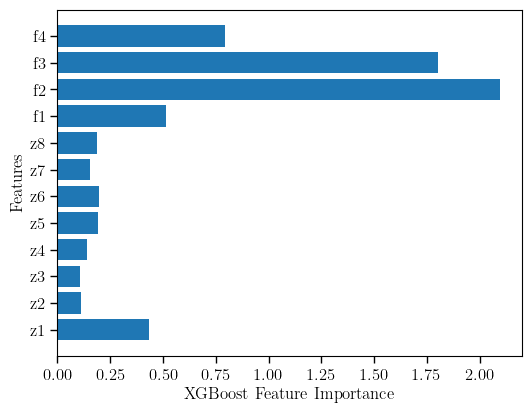

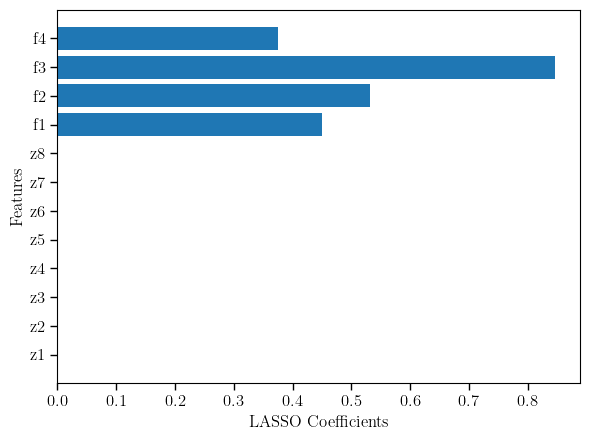

In [2]:
run_folder = '/Users/maitreyeesharma/WORKSPACE/PostDoc/Chemistry/SPIRAL/codes/RL/ReLMM/'
    
## Reading the input json file with dataset filename and path information
#with open(run_folder+'inputs.json', "r") as f:
#    input_dict = json.load(f)

#input_type = input_dict['InputType']
#input_path = input_dict['InputPath']
#input_file = input_dict['InputFile']
#output_dir = input_dict['OutputDirectory']

input_type='SynthData'
input_path='/Users/maitreyeesharma/WORKSPACE/PostDoc/Chemistry/SPIRAL/codes/RL/ReLMM/synthetic_dataset/'
input_file='synthetic_data_randomSamples_200_sumf5.csv' 
test_file='test_synthetic_data_randomSamples_89_sumf5.csv'
output_dir=run_folder+'output/soa/'
file_name_prefix=output_dir+input_file.split('.csv')[0] 

input_data = inputs(input_type=input_type,
                           input_path=input_path,
                           input_file=input_file)

X_data, Y_data, descriptors = input_data.read_inputs()
X_stand_DT, X_stand_DT_df, scalerX = utilsd.standardize_data(X_data)
Y_stand_DT, Y_stand_DT_df, scalerY = utilsd.standardize_data(pd.DataFrame({'target':Y_data[:,0]}))

input_data2 = inputs(input_type=input_type,
                           input_path=input_path,
                           input_file=test_file)
X_testdata, Y_testdata, descriptors_test = input_data2.read_inputs()
X_test_stand = scalerX.transform(X_testdata)
X_test_stand_df = pd.DataFrame(X_test_stand, columns=X_stand_DT_df.columns)
Y_test_stand = scalerY.transform(pd.DataFrame({'target':Y_testdata[:,0]}))
Y_test_stand_df = pd.DataFrame(Y_test_stand, columns=Y_stand_DT_df.columns)

methods = soa_methods(X_stand_DT,Y_stand_DT,X_test=X_test_stand,y_test=Y_test_stand)

feature_importance_dict_xgboost, importance_df_xgboost, mse_test_xgboost = methods.xgboost(X_stand_DT, Y_stand_DT, descriptors,
                                                                                                   save_fig=False,fig_name=file_name_prefix+'_xgboost.pdf')
feature_importance_dict_lasso, importance_df_lasso, mse_test_lasso = methods.lasso(X_stand_DT, Y_stand_DT, descriptors,
                                                                                       save_fig=False,fig_name=file_name_prefix+'_lasso.pdf')

print(mse_test_xgboost)
print(mse_test_lasso)
mse_df = pd.DataFrame([[mse_test_xgboost,mse_test_lasso]],columns=['MSE_xgboost','MSE_lasso'])
# importance_df_xgboost.to_csv(file_name_prefix+'_xgboost.csv')
# importance_df_lasso.to_csv(file_name_prefix+'_lasso.csv')
# mse_df.to_csv(file_name_prefix+'_soa_mse_test.csv')
